# Chapter 02 사이킷런으로 시작하는 머신러닝
P.87

## 01.사이킷런 소개와 특징
P.87

`pip install`

`conda install` Anaconda 

`__version__` 버전 확인

In [1]:
import sklearn


print(sklearn.__version__)

0.23.2


## 02.첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
P.88

__분류(Classification)__ : 지도학습(Supervised Learning) 방법의 하나

지도학습 : 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식

    - 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
    - 테스트 데이터 세트 : 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

`sklearn.모듈명` → P.94

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

`DataSet.data` 피처(feature), X

`DataSet.target` 레이블(lable, 결정값), Y

In [3]:
import pandas as pd


# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()


# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data


# iris.target은 불꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)


# 불꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**① 데이터 세트 분리**

`train_test_split(data, target, test_size= , random_state= )`

_Python : random_state  =  R : set.seed()_

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,test_size=0.2, random_state=11)

**② 학습**

`.fit(X_train, y_train)`

`DecisionTreeClassifier(random_state= )`

In [5]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)


# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

**③ 예측**

`.predict(X_test)` 

In [6]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

**④ 평가**

정확도 측정 `accuracy_score(y_test, pred)`

In [7]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


## 03.사이킷런의 기반 프레임워크 익히기
P.93

### Estimator 이해 및 fit(), predict() 메서드
P.93

__지도학습__ 분류, 회귀 `fit()` `predict()`

<img src="Estimator.jpg" width=800>

__비지도학습__ 차원 축소, 클러스터링, 피처 추출 `fit()` `transform()` `fit_transform()`

### 사이킷런의 주요 모듈
P.94

### 내장된 예제 데이터 세트
P.96

사이킷런에 내장된 데이터 세트는 일반적으로 `딕셔너리` 형태

* data

* target

* target_names

* feature_names

* DESCR

In [8]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


( sklearn.utils.Bunch ~= 파이썬 딕셔너리 )

In [9]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


`DataSet.data` `DataSet['data']`

In [10]:
print('feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)


print('\ntarget_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)


print('\ndata의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])


print('\ntarget의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data['target'])

feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

## 04.Model Selection 모듈 소개
P.100

`sklearn.model_selection`

1. 학습 데이터와 테스트 데이터 세트를 분리


2. 교차 검증 분할 및 평가


3. Estimator의 하이퍼 파이미터 튜닝

### 학습/테스트 데이터 세트 분리 - train_test_split()
P.100

예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 함.

`train_test_split(DataSet.data, DataSet.target, test_size=0.25, random_state= )`

    test_size : 테스트 데이터 세트 크기. Default는 0.25(25%)
    
    random_state : 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


dt_clf = DecisionTreeClassifier()
iris_data = load_iris()


X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [12]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9556


☆중요☆

학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것

학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것

### 교차 검증
P.102

과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것

    → 교차 검증
    

교차 검증 : 여러 세트로 구성된 __학습 데이터 세트__와 __검증 데이터 세트__에서 학습과 평가를 수행. 최종적으로 __테스트 데이터 세트__에 적용해 평가.

<img src='DataSet2.jpg' width=900>

#### 1) K 폴드 교차 검증

K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 '학습'과 '검증 평가'를 반복적으로 수행하는 방법

K개의 평가를 __평균__한 결과를 가지고 예측 성능을 평가


`KFold` `StratifiedKFold`

`KFold(n_splits= )`

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np


iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)


# 5개의 폴드 세드로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('불꽃 데이터 세트 크기:', features.shape[0])

불꽃 데이터 세트 크기: 150


`kfold.split(DataSet.data)` 인덱스 반환

In [14]:
n_iter = 0


# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인텍스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인텍스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인텍스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인텍스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인텍스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인텍스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


☆ split() 함수의 인덱스 할당 방식 주의

#### 2) Stratified K 폴드

불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

e.g. 대출 사기 데이터

In [15]:
import pandas as pd


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

`kfold.split(DataFrame)`

In [16]:
skf = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
0    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    30
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
1    40
0    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    20
1    10
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    50
0    50
1    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    30
Name: label, dtype: int64
## 교차 검증: 4
학습 레이블 데이터 분포:
 0    50
1    40
2    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    20
1    10
Name: label, dtype: int64
## 교차 검증: 5
학습 레이블 데이터 분포:
 1    50
0    50
2    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    30
Name: label, dtype: int64


`StratifiedKFold(n_splits= )`

`skf.split(DataFrame, DataFrame['label'])` 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요

In [17]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=3)
n_iter=0
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [18]:
dt_clf = DecisionTreeClassifier(random_state=156)


skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]


# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추갸 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


분류(Classification) - Stratified K 폴드

회귀(Regression) - K 폴드 (Stratified K 폴드 지원X 결정값이 연속된 숫자값이기 때문에)

#### 3) 교차 검증을 보다 간편하게 - cross_val_score()

`cross_val_score(estimator, X, y, scoring='', cv= )` scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris


iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)


data = iris_data.data
label = iris_data.target


# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


`cross_val_score()` 하나의 평가 지표

`cross_validate()` 여러 개의 평가 지표

### GridSearchCV - 교차 검증과 최적 하이퍼 피라미터 튜닝을 한 번에
P.113

`GridSearchCV` 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출

GridSearchCV(estimator, param_grid=, cv=, refit=True)

- param_grid : 테스트할 하이퍼 파라미터 세트는 __딕셔너리__ 형태 (하이퍼 파라미터의 명칭은 문자열 Key 값 + 하이퍼 파라미터의 값은 리스트 형)


- refit : 입력된 estimator를 최적의 하이퍼 파라미터로 재학습. Default는 True


- 수행시간이 상대적으로 오래 걸림

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()


### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

`GridSearchCV.cv_results_` gridsearchcv의 결과 세트. 딕셔너리 형태

In [21]:
import pandas as pd


# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)


# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)


# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


rank_test_score = 1일 때 최적의 하이퍼 파라미터

`GridSearchCV.best_params_` 최고 성능을 나타낸 하이퍼 파라미터의 값

`GridSearchCV.best_scores_` 그때의 평가 결과 값

(즉, cv_results_의 rank_test_score가 1일 때의 값)

In [22]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


`GridSearchCV.best_estimator_` refit=True(Default) GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 estimator를 학습해 속성에 저장

In [23]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_


# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으모로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

## 05.데이터 전처리
P.118

사이킷런의 머신러닝 알고리즘은

<br>

1. 결손값, 즉 NaN, Null 값을 허용하지 않음

    고정된 다른 값으로 변환해야 함

<br>

2. 문자열 값을 입력 값으로 허용하지 않음

    모든 문자열 값은 인코딩돼서 숫자 형으로 변환돼야 함

    + 카테고리형 피처 : 숫자 값으로 변환
    
    + 텍스트형 피처 : 벡터화(챕터8 텍스트 분석) or 삭제

### 데이터 인코딩
P.118

#### 1) 레이블 인코딩 `LabelEncoder`

카테고리 피처를 코드형 숫자 값으로 변환하는 방식

`LabelEncoder.fit()`

`LabelEncoder.transform()`

In [24]:
from sklearn.preprocessing import LabelEncoder


items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기','선풍기', '믹서', '믹서']


# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


`LabelEncoder.classes_` 문자열 값이 어떤 숫자 값으로 인코딩됐는지 확인

In [25]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


`LabelEncoder.inverse_transform()` 인코딩된 값을 다시 디코딩

In [26]:
print( '디코딩 원본값:', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]) )

디코딩 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


레이블 인코딩의 문제점 : 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문에 예측 성능이 떨어지는 경우가 발생할 수 있음

    선형회귀 (X)   트리 계열 (O)
    
    → 원-핫 인코딩

#### 2) 원-핫 인코딩(One-Hot Encoding) `OneHotEncoder`

피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

1. OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 함


2. 입력 값으로 2차원 데이터가 필요

In [27]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기','선풍기', '믹서', '믹서']


# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)


# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


**※ 판다스의 원-핫 인코딩**

`pd.get_dummies(DataFrame)` 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환

In [28]:
import pandas as pd


df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기','선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피쳐 스케일링과 정규화
P.124

피쳐 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

* 표준화 : 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환 `StandardScaler`

    $x_i$_new $= \frac{x_i - mean(x)}{stdev(x)}$

    
* 정규화 : 서로 다른 피처의 크기를 통일하기 위한 변환. 개별 데이터의 크기를 모두 똑같은 단위로 변경 `MinMaxScaler`

    $x_i$_new $= \frac{x_i - min(x)}{max(x) - min(x)}$
    
<br>

벡터 정규화 

* 선형대수에서의 정규화 : 개별 벡터의 크기를 맞추기 위한 변환 `Normalizer`

    $x_i$_new $= \frac{x_i}{\sqrt{{x_i}^2 + {y_i}^2 + {z_i}^2}}$

### StandardScaler
P.125

표준화를 지원하기 위한 클래스

개별 피처를 평균이 0이고, 분산이 1인 값으로 변환 (가우시안 정규 분포)

<br>

`.mean()` 평균

`.var()` 분산

In [29]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)


print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


`scaler.fit(DF)`

`scaler.transform(DF)`

In [30]:
from sklearn.preprocessing import StandardScaler


# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)


# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 가까운 값, 분산은 1에 가까운 값으로 변환됐음

### MinMaxScaler
P.127

데이터 값을 0과 1 사이의 범위 값으로 변환 (음수 값이 있으면 -1에서 1로 변환)

데이터의 분포가 가우시안 분포가 아닐 경우 사용

`scaler.fit(DF)`

`scaler.transform(DF)`

In [31]:
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)


# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
P.128

`fit()` 데이터 변환을 위한 기준 정보 설정

`transform()` 설정된 정보를 이용해 데이터를 변환

`fit_transform()` fit() + transform()

<br>

테스트 데이터에 다시 fit()을 적용해서는 안 되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 한다.

(학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에)

In [49]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [50]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()


# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)


# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled = scaler.transform(train_array)


print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [51]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)


# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환.
test_scaled = scaler.transform(test_array)


# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 스케일링이 맞지 않음

→ 테스트 데이터에 다시 fit()을 적용해서는 안 됨. 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함

In [53]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))


# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform() 테스트 데이터에서는 절대 사용해서는 안 됨.

<br>

☆ 학습과 테스트 데이터 세트로 분리하기 전에 __먼저 전체 데이터 세트에 스케일링을 적용한 뒤__ 학습과 테스트 데이터 세트로 분리 ☆

## 06.사이킷런으로 수행하는 타이타닉 생존자 예측
P.131

타이타닉 탑승자 데이터
* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* pclass: 티켓의 선실 등급, 1 = 일등선, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
print('\n### 학습 데이터 정보 ###\n')
print(titanic_df.info())


### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [21]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
F E69            1
C82              1
B3               1
E38              1
B80              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [22]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [23]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

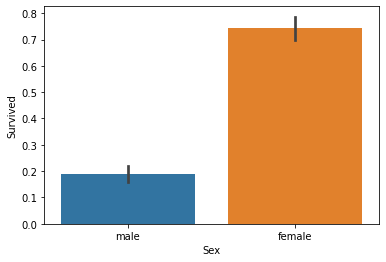

In [24]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

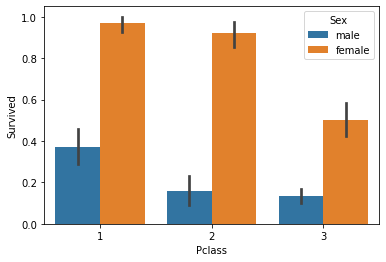

In [25]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

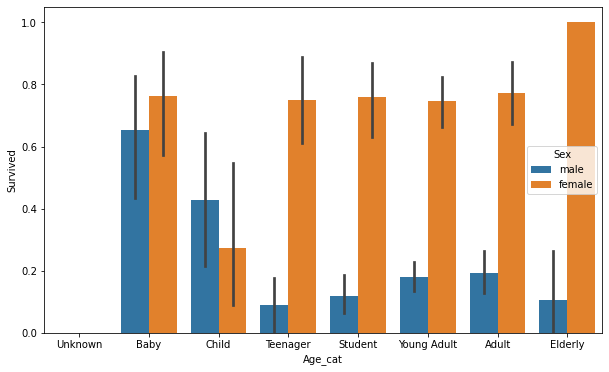

In [26]:
# 입력 age에 따라 구분 값을 반환하는 합수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat


# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))


# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']


# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder


def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF


titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [28]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [29]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)


X_titanic_df = transform_features(X_titanic_df)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.model_selection import KFold


def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 kFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    
    # KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
        
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    
    
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [35]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [36]:
from sklearn.model_selection import GridSearchCV


parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}


grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)


print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


## 07.정리
P.145

머신러닝 구성

1. 데이터의 가공 및 변환 과정의 전처리 작업


2. 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업


3. 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습


4. 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행


5. 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행